# PROJET DE FIN D'ETUDE
## THEME: ANALYSE DES SENTIMENTS POUR LA SATISFACTION CLIENT
### AUTEUR: Herman Nketchemen
### IAS-M2-JV-DA1

### Plan de travail

Contexte
Problematique


### Chargemenet des bibliothèques

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud


In [3]:
# chargement du dataset

df = pd.read_csv("../data/Reviews.csv")
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.shape

(568454, 10)

In [6]:
selected = ["Id", "Score", "Summary", "Text"]
reviews = df[selected]

In [7]:
# Affichage des 20 premières lignes de notre dataset
reviews.head(20)

,Id,Score,Summary,Text
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,5,Great taffy,Great taffy at a great price. There was a wid...
5,6,4,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,5,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...


## Analyse exploratoire des données

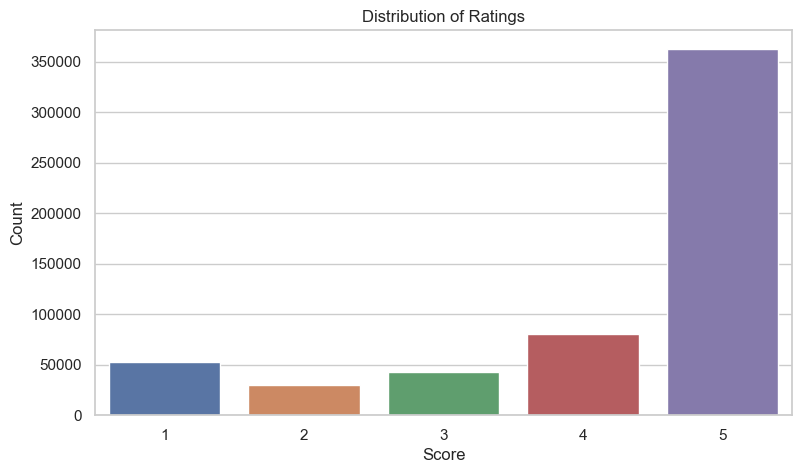

In [8]:
# Plotting the distribution of ratings
sns.set(style="whitegrid")
plt.figure(figsize=(9, 5))
sns.countplot(data=reviews, x='Score')
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_11784\4112132207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['Text Length'] = reviews['Text'].apply(len)


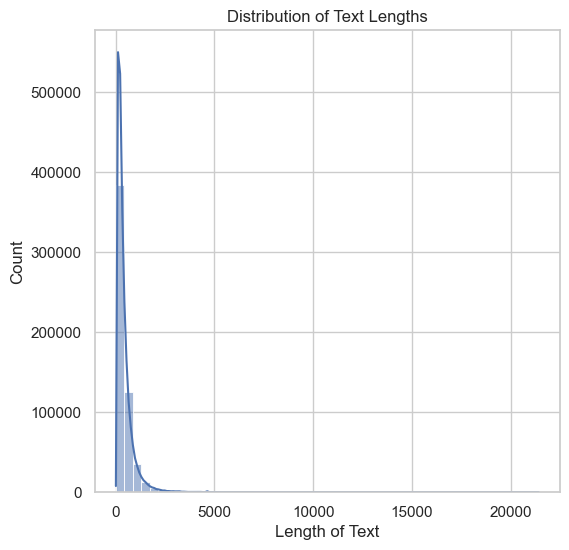

In [16]:
# Calculating the length of each review
reviews['Text Length'] = reviews['Text'].apply(len)

# Plotting the distribution of review lengths
plt.figure(figsize=(6, 6))
sns.histplot(reviews['Text Length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Count')
plt.show()

### Utilisons la bibliotèque texblob pour aujouter les étiquettes aux avis clients (Positive, Negative ou Neutral)

In [17]:
def textblob_sentiment_analysis(review):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review).sentiment
    # Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Applying TextBlob sentiment analysis to the reviews
reviews['Sentiment'] = reviews['Text'].apply(textblob_sentiment_analysis)

# Displaying the first few rows with the sentiment
print(reviews.head())

   Id  Score                Summary  \
0   1      5  Good Quality Dog Food   
1   2      1      Not as Advertised   
2   3      4  "Delight" says it all   
3   4      2         Cough Medicine   
4   5      5            Great taffy   

                                                Text  Text Length Sentiment  
0  I have bought several of the Vitality canned d...          263  Positive  
1  Product arrived labeled as Jumbo Salted Peanut...          190   Neutral  
2  This is a confection that has been around a fe...          509  Positive  
3  If you are looking for the secret ingredient i...          219  Positive  
4  Great taffy at a great price.  There was a wid...          140  Positive  


C:\Users\kevin\AppData\Local\Temp\ipykernel_11784\1848279819.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['Sentiment'] = reviews['Text'].apply(textblob_sentiment_analysis)


In [18]:
reviews.head(20)

,Id,Score,Summary,Text,Text Length,Sentiment
0,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,Positive
1,2,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,Neutral
2,3,4,"""Delight"" says it all",This is a confection that has been around a fe...,509,Positive
3,4,2,Cough Medicine,If you are looking for the secret ingredient i...,219,Positive
4,5,5,Great taffy,Great taffy at a great price. There was a wid...,140,Positive
5,6,4,Nice Taffy,I got a wild hair for taffy and ordered this f...,416,Positive
6,7,5,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,304,Positive
7,8,5,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,140,Positive
8,9,5,Yay Barley,Right now I'm mostly just sprouting this so my...,131,Positive
9,10,5,Healthy Dog Food,This is a very healthy dog food. Good for thei...,137,Positive


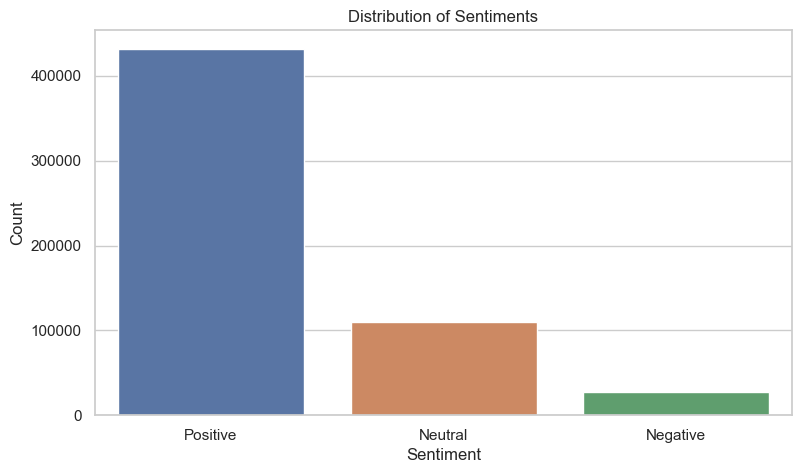

In [19]:
# Analyzing the distribution of sentiments
sentiment_distribution = reviews['Sentiment'].value_counts()

# Plotting the distribution of sentiments
plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

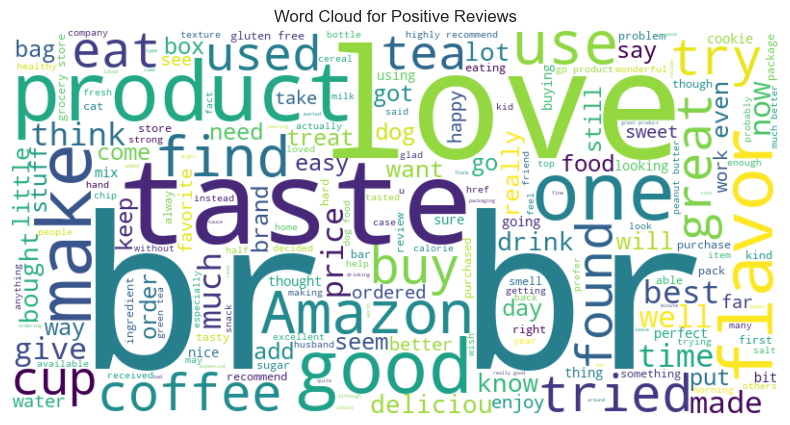

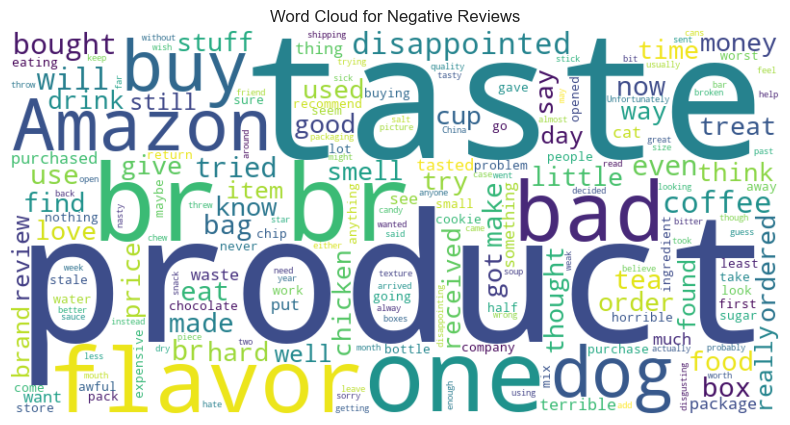

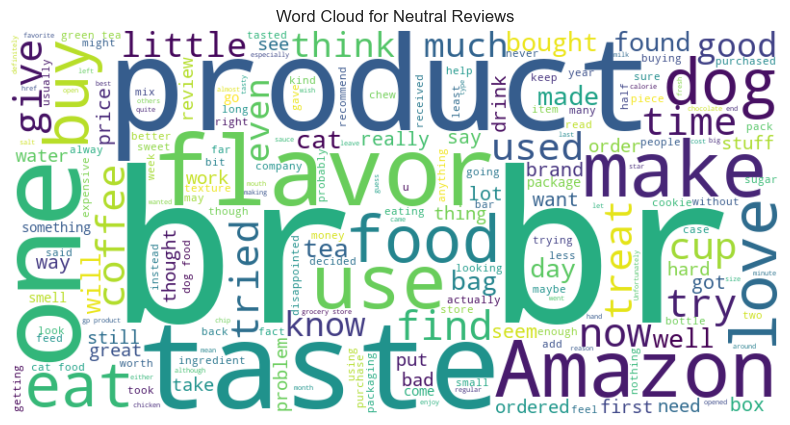

In [21]:
# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in reviews[reviews['Sentiment'] == sentiment]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)

### DATA PREPROCESSING

In [ ]:
corpus = []

for i in range(len(reviews)):
    review = reviews[reviews['Sentiment'] == "Negative", "Text"].iloc[i]
    if isinstance(review, str):
        review = re.sub('[^a-zA-Z]', ' ', review)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)
    else:
        corpus.append('')